# Домашняя работа №1. NumPy.

## Курс "Машинное обучение", программа AI Masters

Правила:

- нужно заполнить ячейки текущего ноутбука (**не нужно** создавать новый ноутбук и копировать в него код)
- для решения задач использовать только библиотеку numpy.
- запрещается использовать
- - циклы for/while
- - goto
- - любые функции из https://numpy.org/doc/stable/reference/routines.functional.html (кроме задачи №8)
- после каждой задачи предложен небольшой набор тестов, тесты удалять нельзя, можно добавлять новые

ФИО: Зернов Данил Антонович


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

**Задача 1. (1 балл)** Напишите функцию `get_nonzero_diag_product(X)`, которая подсчитывает произведение ненулевых элементов на диагонали прямоугольной матрицы. Если все элементы на диагонали нулевые, функция должна вернуть `None`.

In [56]:
def get_nonzero_diag_product(a):
    diag_elems = np.diag(a)
    diag_elems = diag_elems[diag_elems != 0]
    if (len(diag_elems) == 0):
      return None
    else:
      return np.prod(diag_elems)

In [57]:
assert np.isclose(get_nonzero_diag_product(
    np.array(
        [[2, 5, 6, 2, 2],
        [9, 2, 6, 6, 9],
        [4, 4, 3, 1, 4],
        [8, 4, 5, 9, 6],
        [5, 3, 5, 5, 3]]
    )
), 324.0)
assert np.isclose(get_nonzero_diag_product(
    np.array(
        [[1, 4, 5, 1, 5, 7, 4, 7, 1, 4, 3, 3, 2, 6, 3, 6],
        [8, 6, 1, 9, 1, 6, 6, 8, 4, 7, 8, 7, 9, 5, 7, 4],
        [8, 6, 6, 1, 7, 2, 3, 1, 7, 2, 6, 5, 8, 1, 9, 1],
        [3, 8, 7, 5, 4, 1, 7, 3, 8, 1, 6, 4, 3, 1, 1, 7],
        [6, 4, 9, 6, 7, 8, 5, 6, 9, 4, 6, 4, 2, 5, 4, 3],
        [7, 4, 5, 1, 4, 0, 4, 7, 2, 7, 3, 2, 8, 6, 4, 8],
        [5, 5, 6, 8, 8, 3, 8, 2, 5, 5, 3, 2, 7, 1, 5, 3],
        [8, 8, 2, 3, 6, 8, 8, 4, 2, 6, 9, 8, 2, 8, 9, 3],
        [4, 3, 3, 3, 9, 2, 8, 8, 7, 2, 3, 6, 7, 7, 9, 5],
        [5, 2, 5, 2, 9, 2, 3, 5, 3, 4, 5, 7, 9, 3, 7, 9],
        [6, 5, 9, 2, 7, 6, 7, 6, 1, 8, 1, 7, 6, 6, 3, 2],
        [4, 8, 5, 6, 6, 5, 4, 1, 9, 9, 4, 3, 4, 5, 7, 3],
        [9, 1, 9, 6, 8, 7, 8, 2, 7, 5, 9, 9, 8, 5, 2, 6],
        [5, 6, 7, 4, 1, 9, 9, 6, 2, 6, 4, 2, 3, 5, 4, 9],
        [9, 6, 3, 1, 7, 3, 6, 1, 9, 8, 4, 9, 3, 7, 6, 1],
        [9, 5, 6, 8, 7, 5, 4, 3, 9, 9, 4, 4, 3, 3, 1, 3]]
    )
),2438553600.0)
assert np.isclose(get_nonzero_diag_product(
    np.array(
        [[1, 0],
        [0,0]]
    )
), 1.0)
assert get_nonzero_diag_product(
    np.array(
        [[0, 1],
        [1,0]]
    )
) is None

**Задача 2. (2 балла)** Охотники за сокровищами отправились за очередным кладом в необычное место, которое называется "Поле чудес". "Поле чудес" имеет размер $H$ на $W$ метров. На каждом квадратном метре "Поля чудес" закопан сундук с определённым количеством камней. Скоро "Поле чудес" должен посетить лепрекон. Под влиянием лепрекона камни в сундуках превращаются в золотые монеты. Лепрекон появляется в определённой клетке поля и действует на прямоугольную область размером $h$ на $w$, верхний левый край этой области - точка, где стоит лепрекон. Охотники за сокровищами не знают, когда точно появятся лепрекон, но хотят получить как можно больше золота. Известно вероятностное распределение на появление лепрекона в каждый момент времени в каждой клетке поля. Необходимо для каждой клетки "Поля чудес" посчитать математическое ожидание награды, которое будет получено от этой клетки. </br>
Необходимо написать функцию `calc_expectations(h, w, X, Q)`, где:
* $h$, $w$ - размеры области влияния лепрекона;
* $X$ - матрица целых чисел размера $H$ на $W$; $X[i, j]$ - количество камней в $i$, $j$ клетке;
* $Q$ - матрица вещественных чисел размера $H$ на $W$, задающая вероятностное распределение; $Q[i, j]$ - вероятность появления лепрекона в точке $i$, $j$.
Функция возвращает матрицу $E$ размера $H$ на $W$; $E[i, j]$ – математическое ожидание награды в $i$, $j$ клетке.

In [24]:
def calc_expectations(h, w, X, Q):
    H, W = X.shape
    S = np.pad(Q, ((1, 0), (1, 0))).cumsum(axis=0).cumsum(axis=1)
    i = np.arange(H).reshape(H, 1)
    j = np.arange(W).reshape(1, W)
    i1 = np.maximum(i - h + 1, 0)
    j1 = np.maximum(j - w + 1, 0)

    sum_Q = S[i + 1, j + 1] - S[i1, j + 1] - S[i + 1, j1] + S[i1, j1]

    E = X * sum_Q
    return E

In [25]:
assert np.isclose(calc_expectations(
    h=3, w=2,
    X=np.array([[1, 7, 7, 3, 9, 9, 1, 6, 5, 4, 2, 8, 1],
       [4, 2, 3, 3, 5, 2, 9, 8, 1, 6, 4, 0, 8],
       [7, 0, 1, 0, 2, 5, 8, 6, 6, 1, 2, 5, 3],
       [6, 6, 4, 7, 5, 6, 3, 6, 3, 7, 6, 3, 0],
       [5, 0, 1, 2, 3, 1, 6, 5, 7, 6, 6, 7, 4],
       [7, 5, 0, 7, 0, 7, 7, 6, 8, 2, 2, 1, 0],
       [7, 9, 3, 4, 3, 1, 8, 1, 2, 4, 4, 8, 5],
       [8, 9, 7, 2, 3, 3, 5, 2, 6, 6, 3, 4, 0],
       [0, 6, 1, 4, 7, 7, 4, 3, 0, 6, 4, 7, 0],
       [0, 1, 2, 3, 3, 2, 4, 2, 9, 0, 0, 7, 1],
       [3, 9, 6, 8, 8, 8, 4, 1, 4, 1, 3, 7, 8],
       [9, 3, 9, 8, 6, 8, 5, 6, 8, 8, 7, 3, 7],
       [8, 1, 6, 5, 4, 2, 2, 2, 4, 7, 5, 3, 0],
       [3, 6, 5, 1, 9, 4, 1, 6, 1, 5, 1, 0, 4],
       [9, 9, 3, 9, 7, 2, 1, 6, 2, 0, 3, 1, 2]]),
    Q=np.array([[7.06128335e-03, 4.32854712e-03, 4.97282659e-03, 4.28975248e-04,
        1.52144978e-02, 1.14482542e-02, 2.43938459e-04, 4.80466426e-03,
        9.64372202e-03, 7.03184347e-04, 3.84977818e-03, 1.05776223e-02,
        5.14362886e-03],
       [9.24436313e-03, 2.98413494e-03, 3.81136898e-03, 1.27570431e-04,
        1.60259127e-03, 9.37890642e-03, 1.61064289e-03, 7.28946679e-03,
        1.01010935e-03, 2.15836495e-03, 1.31738567e-05, 1.14783479e-02,
        9.97960200e-03],
       [1.67218293e-04, 4.16501424e-04, 5.28334039e-03, 4.02056616e-03,
        3.00437192e-03, 1.03583698e-03, 2.27912907e-03, 2.88989768e-04,
        6.18067342e-04, 5.58853705e-03, 3.04100386e-03, 3.77874165e-03,
        1.33713333e-02],
       [2.45054020e-03, 1.48131719e-02, 9.37826740e-03, 4.01778158e-03,
        5.62975005e-03, 1.23175453e-03, 1.92210924e-03, 6.50115831e-04,
        2.58719085e-03, 8.82945015e-03, 4.16173256e-03, 1.11269840e-03,
        1.80684370e-02],
       [1.09214591e-02, 2.02144550e-04, 3.70331471e-03, 3.21898170e-03,
        1.32230961e-03, 3.38907853e-04, 2.86048746e-02, 6.57763115e-03,
        1.03342216e-02, 3.36307060e-03, 1.39462107e-03, 1.51722255e-03,
        4.77644269e-03],
       [1.24691673e-02, 1.14883425e-04, 2.34377535e-03, 1.01890955e-02,
        5.34093343e-04, 1.22731966e-02, 2.95428821e-05, 2.06061711e-02,
        9.88025717e-03, 1.12686415e-02, 2.65915247e-03, 3.21341448e-03,
        7.17936871e-03],
       [2.13617503e-03, 5.71984734e-03, 2.79848540e-03, 3.40777682e-03,
        1.15609179e-02, 3.91498088e-05, 1.80787329e-03, 1.03214913e-02,
        7.73538022e-03, 1.11142219e-02, 2.40040379e-02, 8.42967363e-03,
        9.26405047e-04],
       [6.90240005e-03, 8.16304951e-03, 6.25103891e-03, 1.41531521e-03,
        7.89217265e-04, 1.24966032e-03, 3.14008357e-04, 7.66669841e-04,
        6.56264219e-03, 7.81723070e-03, 3.06695412e-03, 5.11854896e-04,
        5.06722512e-03],
       [2.70175496e-03, 9.20090175e-03, 6.10387733e-03, 1.02609252e-03,
        1.86663943e-02, 2.08808201e-03, 8.71209671e-03, 2.18200558e-02,
        7.60681873e-03, 4.67633850e-03, 4.65817470e-03, 9.21299105e-04,
        1.39679240e-02],
       [2.58766787e-03, 6.52264534e-03, 9.65563514e-03, 3.60784283e-03,
        8.79132503e-04, 2.09843044e-02, 3.17645988e-02, 2.04132132e-03,
        2.85657713e-04, 1.83877515e-04, 9.11058226e-04, 8.90937467e-04,
        3.88812912e-03],
       [7.22181563e-04, 4.19326167e-03, 4.95612899e-03, 3.09710053e-03,
        7.22291467e-03, 8.10639226e-03, 6.08628598e-04, 1.40044281e-02,
        1.61217102e-03, 2.98495531e-03, 1.41543605e-03, 1.93246291e-03,
        1.58283598e-02],
       [3.50661973e-03, 1.59955713e-03, 1.82168727e-03, 2.46812348e-03,
        2.58454429e-03, 2.48769676e-03, 4.61508131e-03, 1.24920430e-03,
        6.66907801e-04, 1.78574112e-03, 1.37351482e-04, 9.51255891e-04,
        3.20192712e-03],
       [8.72525597e-03, 2.63267794e-03, 4.05495868e-03, 9.03072585e-04,
        2.91856530e-03, 2.92281946e-03, 1.56003992e-03, 1.58268947e-03,
        8.33970186e-04, 8.88024788e-03, 1.66234524e-03, 4.09011375e-03,
        3.33138968e-03],
       [7.77890419e-03, 1.30059099e-03, 6.20490348e-03, 1.56875193e-02,
        5.03494568e-04, 2.19313582e-03, 1.12671022e-02, 3.33937831e-03,
        1.15536395e-02, 2.49040352e-03, 3.04110068e-03, 7.23072815e-05,
        3.23531924e-04],
       [6.21812399e-06, 1.99343356e-03, 1.15646432e-03, 3.78298926e-03,
        1.95689674e-03, 9.06572986e-03, 5.81139437e-03, 2.37368024e-03,
        6.48178061e-04, 6.13076244e-03, 1.85840964e-04, 1.01424413e-03,
        1.11364064e-02]])
), np.array([[0.00706, 0.07973, 0.06511, 0.01621, 0.14079, 0.23996, 0.01169,
        0.03029, 0.07224, 0.04139, 0.00911, 0.11542, 0.01572],
       [0.06522, 0.04724, 0.04829, 0.02802, 0.08687, 0.07529, 0.20414,
        0.11159, 0.02275, 0.08109, 0.0269 , 0.     , 0.29743],
       [0.11531, 0.     , 0.0218 , 0.     , 0.0488 , 0.20842, 0.20797,
        0.0991 , 0.14193, 0.01972, 0.03071, 0.16369, 0.16299],
       [0.07117, 0.18046, 0.14675, 0.18647, 0.09201, 0.1313 , 0.05238,
        0.08424, 0.03733, 0.14554, 0.14275, 0.07076, 0.     ],
       [0.0677 , 0.     , 0.0338 , 0.05924, 0.06364, 0.01256, 0.21248,
        0.20161, 0.14739, 0.18792, 0.15827, 0.10504, 0.1705 ],
       [0.18089, 0.20486, 0.     , 0.22996, 0.     , 0.14931, 0.3108 ,
        0.35034, 0.40508, 0.09253, 0.06335, 0.01406, 0.     ],
       [0.17869, 0.28407, 0.04465, 0.10265, 0.0907 , 0.02607, 0.34475,
        0.06795, 0.13091, 0.21478, 0.21521, 0.32974, 0.13021],
       [0.17206, 0.31955, 0.17774, 0.05281, 0.08369, 0.07934, 0.07857,
        0.06769, 0.33524, 0.32627, 0.17979, 0.16754, 0.     ],
       [0.     , 0.20894, 0.03824, 0.08401, 0.25806, 0.24075, 0.05684,
        0.13123, 0.     , 0.27308, 0.22135, 0.29114, 0.     ],
       [0.     , 0.03608, 0.09179, 0.08418, 0.07915, 0.08931, 0.26045,
        0.13084, 0.35175, 0.     , 0.     , 0.07672, 0.02525],
       [0.01803, 0.23336, 0.24379, 0.22757, 0.276  , 0.46358, 0.28906,
        0.07895, 0.18948, 0.01735, 0.04449, 0.07511, 0.29943],
       [0.06135, 0.0574 , 0.25874, 0.20485, 0.11916, 0.33812, 0.34283,
        0.3257 , 0.15888, 0.06015, 0.05193, 0.01872, 0.18685],
       [0.10363, 0.02138, 0.11555, 0.08651, 0.07678, 0.05249, 0.0406 ,
        0.04724, 0.0798 , 0.11735, 0.08433, 0.03057, 0.     ],
       [0.06003, 0.15326, 0.08807, 0.03114, 0.22559, 0.05444, 0.02505,
        0.14168, 0.01923, 0.13105, 0.018  , 0.     , 0.04788],
       [0.14859, 0.20193, 0.05203, 0.28611, 0.18027, 0.03912, 0.03282,
        0.15561, 0.04066, 0.     , 0.06717, 0.01007, 0.03994]]),
atol=1e-5).all()
assert np.isclose(calc_expectations(
    h=3, w=3,
    X=np.array([[2, 7, 9, 0, 2, 5, 5, 7, 3, 4, 2, 5],
       [6, 1, 0, 5, 2, 3, 3, 5, 8, 6, 6, 5],
       [1, 3, 2, 4, 5, 7, 2, 2, 8, 9, 6, 0],
       [6, 6, 8, 4, 3, 6, 2, 1, 9, 1, 7, 8],
       [5, 2, 1, 0, 3, 6, 3, 5, 9, 5, 1, 2],
       [4, 8, 0, 5, 0, 1, 1, 2, 1, 1, 5, 2],
       [9, 4, 8, 2, 4, 4, 0, 1, 2, 5, 0, 4],
       [7, 1, 2, 7, 5, 0, 6, 0, 6, 7, 8, 3],
       [1, 0, 3, 9, 6, 9, 4, 6, 8, 6, 1, 7],
       [4, 9, 5, 2, 5, 4, 7, 0, 6, 0, 8, 2]]),
    Q=np.array([[1.71238669e-03, 1.55413744e-02, 2.08862328e-03, 3.55538496e-03,
        1.95990451e-03, 1.00044745e-02, 2.91725111e-03, 1.20132768e-02,
        1.26490502e-03, 9.64540307e-03, 6.98106184e-03, 2.34805879e-03],
       [1.16212068e-03, 1.28573381e-02, 3.73942916e-03, 1.26997497e-02,
        1.15507775e-02, 5.12999149e-02, 4.46599947e-03, 8.96195926e-03,
        3.26562433e-03, 1.33592903e-02, 1.48783045e-02, 7.29692512e-03],
       [7.22816115e-03, 8.29477674e-04, 1.40258234e-03, 8.70178335e-04,
        9.72182219e-03, 2.61014193e-03, 4.47422839e-03, 4.07366574e-03,
        1.81118860e-02, 2.38088827e-03, 2.15111239e-03, 1.02622269e-02],
       [3.07640514e-02, 1.27290011e-02, 6.56841434e-03, 1.36221826e-02,
        3.00983011e-03, 1.10971636e-02, 3.14050824e-03, 2.13304509e-02,
        7.82599183e-03, 5.13074506e-03, 8.26935784e-04, 3.32621001e-03],
       [1.15239211e-02, 2.62619638e-03, 1.65784614e-02, 1.86215764e-03,
        3.11562959e-02, 5.22875845e-03, 1.22810739e-03, 1.10905158e-02,
        5.75947601e-03, 3.32349134e-04, 9.00095074e-05, 4.52646230e-03],
       [9.30858835e-03, 1.37756404e-02, 3.54106584e-04, 1.30903138e-02,
        4.97349468e-03, 9.94261422e-03, 1.28403371e-02, 1.06304637e-02,
        1.51078738e-02, 8.71856605e-04, 1.23456817e-02, 1.50775997e-04],
       [1.84394935e-02, 3.58954710e-03, 3.81524909e-03, 2.94691671e-03,
        5.92932110e-03, 6.16479143e-03, 1.38398733e-02, 8.92694844e-03,
        7.73568044e-03, 3.91594942e-04, 2.83525880e-04, 2.83183640e-02],
       [2.13611537e-02, 3.50875073e-03, 6.60119919e-03, 2.20712423e-03,
        2.89168752e-03, 1.21228726e-02, 2.68380063e-03, 3.49115251e-03,
        1.06256239e-02, 1.01182590e-02, 3.61555220e-03, 9.32395320e-03],
       [1.92236786e-02, 9.98425924e-03, 6.79936677e-03, 4.86395882e-04,
        8.19761179e-03, 9.44571517e-03, 4.38652132e-05, 2.01314236e-02,
        3.64075006e-03, 4.93460683e-03, 5.32134959e-03, 1.54272693e-03],
       [2.15072174e-02, 5.43825762e-03, 7.69196773e-03, 3.16267475e-03,
        6.96389199e-03, 3.58720374e-04, 3.07680501e-02, 1.95104145e-02,
        8.05919945e-03, 6.98290882e-03, 9.88057241e-03, 6.54008765e-03]])
), np.array([[0.00342, 0.12078, 0.17408, 0.     , 0.01521, 0.0776 , 0.07441,
        0.17455, 0.04859, 0.09169, 0.03578, 0.09487],
       [0.01725, 0.03127, 0.     , 0.25241, 0.07119, 0.27321, 0.24659,
        0.44831, 0.26311, 0.29106, 0.29637, 0.27255],
       [0.0101 , 0.11799, 0.09312, 0.21434, 0.23794, 0.72991, 0.19801,
        0.20164, 0.47639, 0.65769, 0.43223, 0.     ],
       [0.23493, 0.39342, 0.61824, 0.26127, 0.18955, 0.69889, 0.20274,
        0.11145, 0.68085, 0.08444, 0.47552, 0.4769 ],
       [0.24758, 0.1314 , 0.09025, 0.     , 0.25438, 0.47507, 0.215  ,
        0.32137, 0.69331, 0.38018, 0.04261, 0.05805],
       [0.20639, 0.64582, 0.     , 0.40603, 0.     , 0.09398, 0.08262,
        0.17306, 0.08895, 0.07808, 0.24145, 0.0552 ],
       [0.35345, 0.23705, 0.64009, 0.11728, 0.32283, 0.32518, 0.     ,
        0.07989, 0.17432, 0.30423, 0.     , 0.18924],
       [0.34376, 0.06998, 0.16151, 0.34922, 0.21405, 0.     , 0.42833,
        0.     , 0.51529, 0.4753 , 0.48877, 0.19626],
       [0.05902, 0.     , 0.27997, 0.35945, 0.23925, 0.45353, 0.24528,
        0.4611 , 0.56895, 0.41998, 0.04667, 0.44695],
       [0.24837, 0.72921, 0.51058, 0.09176, 0.22501, 0.18335, 0.51433,
        0.     , 0.59373, 0.     , 0.50543, 0.11652]]),
atol=1e-5).all()

**Задача 3. (1 балл)** Напишите функцию `replace_nan_to_means(X)`, принимающую матрицу $X$. Функция должна вернуть копию матрицы $X$, в которой все значения `nan` в каждом столбце заменены на среднее арифметическое остальных элементов столбца. В случае столбца из одних `nan` необходимо заменить все элементы столбца на нули. Исходная матрица `X` должна остаться неизменной.

In [58]:
def replace_nan_to_means(X):
  X_copy = np.array(X, copy = True)
  mean_vals = np.nanmean(X_copy, axis = 0)
  full_nan = np.isnan(X_copy).all(axis = 0)
  ind_nan = np.where(np.isnan(X_copy))
  X_copy[ind_nan] = np.take(mean_vals,ind_nan[1])
  X_copy[:,full_nan] = 0
  return X_copy

In [59]:
assert np.isclose(
    replace_nan_to_means(np.array([[0, 1, 2], [np.nan, 1, np.nan], [5, 6, 7]])),
    np.array([[0, 1, 2], [2.5, 1, 4.5], [5, 6, 7]])).all()
assert np.isclose(
    replace_nan_to_means(
        np.array(
            [[ 6.,  1.,  5.],
            [ 6.,  8.,  7.],
            [ 5.,  8.,  7.],
            [np.nan,  2.,  2.],
            [np.nan,  3.,  1.]])
    ),
    np.array(
        [[6.     , 1.     , 5.     ],
        [6.     , 8.     , 7.     ],
        [5.     , 8.     , 7.     ],
        [5.66667, 2.     , 2.     ],
        [5.66667, 3.     , 1.     ]]
    )
).all()


**Задача 4. (1 балл)** Напишите `get_max_after_zero(x)`, возвращающую максимальный элемент в векторе $x$ среди элементов, перед которыми стоит нулевой. Если подходящих элементов нет, функция должна возвращать `None`.

In [54]:
def get_max_after_zero(x):
    afterzero_ind = np.where(x[:-1] == 0)[0]+1
    if (len(afterzero_ind) == 0):
      return None
    else:
      return np.max(x[afterzero_ind])

In [55]:
assert get_max_after_zero(np.array([1, 2, 9, 8, 0, 5])) == 5
assert get_max_after_zero(np.array([2, 0, 2, 5, 0, 1, 0, 0, 4, 7])) == 4
assert get_max_after_zero(np.array([ -7,  -1,   5,  -4,  -6,   0,  -3,  -5,   0, -10])) == -3
assert get_max_after_zero(np.array([1, 2, 3, 4, 0])) is None

**Задача 5. (1 балл)** Напишите функцию `encode_rle(x)`, реализующую кодирование длин серий (Run-length encoding). По входному вектору x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй — сколько раз их нужно повторить.

In [60]:
def encode_rle(x):
    change_points = np.diff(x) != 0
    ind = np.concatenate(([0], np.where(change_points)[0] + 1))
    values = x[ind]
    lengths = np.diff(np.concatenate((ind, [len(x)])))

    return values, lengths

In [61]:
assert encode_rle(np.array([0])) == (np.array([0]), np.array([1]))
values, count = encode_rle(np.array([5, 5, 5, 2, 2, 2, 4, 4]))
assert (values == np.array([5,2,4])).all()
assert (count == np.array([3,3,2])).all()
values, count = encode_rle(np.array([1, 1, 1, 0, 0, 1, 1, 0, 1]))
assert (values == np.array([1, 0, 1, 0, 1])).all()
assert (count == np.array([3, 2, 2, 1, 1])).all()

**Задача 6. (1 балл)** Даны матрицы $A$ размера $(n \times d)$ и $B$ размера $(m \times d)$. Напишите функцию `find_equal_lines(A, B)`, которая найдет в A все строки, содержащиеся в B.

In [32]:
def find_equal_lines(A, B):
    A = np.array(A)
    B = np.array(B)
    comparison = (A[:, None, :] == B).all(-1)
    result = np.any(comparison, axis=1)

    return np.where(result)[0]

In [33]:
A = np.array([
    [1, 2, 3],
    [1, 2, 1],
    [4, 5, 6],
    [1, 2, 1],
])
B = np.array([
    [4, 5, 6],
    [4, 5, 6],
    [1, 2, 3],
])
indices = find_equal_lines(A, B)

assert (indices == [0, 2]).all()

A = np.array([
    [0, 1],
    [0, 3],
    [0, 2],
    [1, 1],
    [0, 1],
])
B = np.array([
    [0, 1],
    [1, 1],
])
indices = find_equal_lines(A, B)

assert (indices == [0, 3, 4]).all()

**Задача 7. (1 балл)** Дана матрица $B$ размера $(n \times n)$. Напишите функцию `find_positive_columns(B)`, которая находит индексы столбцов, в которых число положительных элементов больше числа отрицательных.

In [62]:
def find_positive_columns(B):
    pos_cnt = np.sum(B > 0 , axis = 0)
    neg_cnt = np.sum(B < 0 , axis = 0)
    return np.where(pos_cnt > neg_cnt)[0]

In [63]:
B = np.array([[ 3,  2, -1, -3,  4],
       [ 3, -2, -2, -2, -5],
       [ 3,  2, -1,  1,  1],
       [ 2,  0,  4, -2,  0],
       [ 0,  4,  1,  2,  4]])
assert (find_positive_columns(B) == np.array([0, 1, 4])).all()

B = np.array([[-20, -17, -17,  19, -11,  -1],
       [  1,  16,   3, -14,   4,   4],
       [ -8, -19,  18,  19,   3,   4],
       [ -3,  17,   5,  -7, -12, -11],
       [  0,  -4, -15,  -5, -20,  -2],
       [ 15,   4,   9,  -1,  -1,  -6]])
assert (find_positive_columns(B) == np.array([2])).all()

Кодстайл

* проверка онлайн (пример https://codebeautify.org/python-formatter-beautifier)
* линтеры

**Задача 8. (2 балла)** Выберете одну любую задачу 1-7. Реализуйте ее, не используя numpy, можно использовать циклы for/while и тд. Можете сделать несколько новых реализаций. Сравните время работы каждой реализации на одинаковом наборе данных. Опишите свои наблюдения. Пример сравнения времени работы можете найти в семинаре №1.<br>
Вывод наблюдений **нужно** сделать либо в таблице, либо на графике (например, с помощью библиотеки [matplotlib](https://matplotlib.org/), также подумайте сколько эспирементов нужно провести, чтобы сделать вывод (спойлер: не 1).

In [74]:
def get_max_after_zero(x):
    afterzero_ind = np.where(x[:-1] == 0)[0]+1
    if (len(afterzero_ind) == 0):
      return None
    else:
      return np.max(x[afterzero_ind])

def get_max_after_zero_for(x):
  ans = None
  for i in range(1,len(x)):
    if (x[i-1]==0):
      if (ans == None):
        ans = x[i]
      elif (ans < x[i]):
        ans = x[i]
  return ans

def gen_data(size):
  return np.where(np.random.rand(size) < 0.2, 0, np.random.randint(1, 101, size)).tolist()

def func_time(func , data):
    timer = timeit.Timer(lambda: func(data))
    return timer.timeit(number = 100) / 100

<ipython-input-74-f25584c654c6>:2: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  afterzero_ind = np.where(x[:-1] == 0)[0]+1


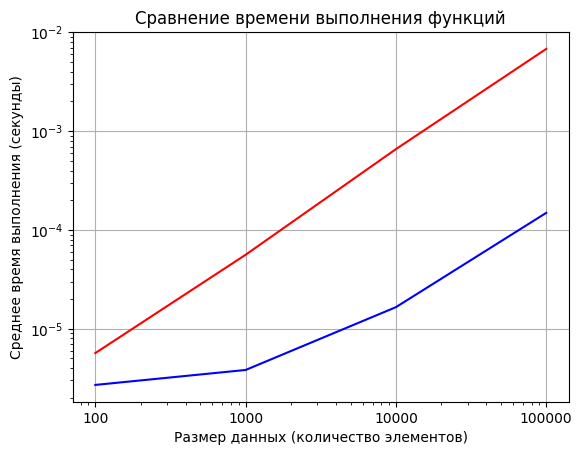

In [94]:
sizes = [10**2, 10**3, 10**4, 10**5]

np_time = []
for_time = []

for size in sizes:
    data = gen_data(size)

    np_time.append(func_time(get_max_after_zero, data))
    for_time.append(func_time(get_max_after_zero_for, data))

plt.plot(sizes, np_time,label='NumPy', color='blue')
plt.plot(sizes, for_time,label='Цикл for', color='red')
plt.xlabel('Размер данных (количество элементов)')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Сравнение времени выполнения функций')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xticks(sizes, labels=[f"{size}" for size in sizes])
plt.show()